In [21]:
from torch.utils.data import Dataset, DataLoader
from typing import Tuple
import matplotlib.pyplot as plt
from collections import defaultdict
from IPython.display import display
from collections import Counter

import torch

In [29]:
class TaskDataset(Dataset):
    def __init__(self, transform=None):
        self.ids = []
        self.imgs = []
        self.labels = []
        self.transform = transform

    def __getitem__(self, index) -> Tuple[int, torch.Tensor, int]:
        id_ = self.ids[index]
        img = self.imgs[index]
        if not self.transform is None:
            img = self.transform(img)
        label = self.labels[index]
        return id_, img, label

    def __len__(self):
        return len(self.ids)

In [28]:
data = torch.load("Train.pt", weights_only=False)

print(len(data))

100000


## 1. EDA

In [30]:
data[0]

(79431, <PIL.Image.Image image mode=RGB size=32x32>, 8)

Index: 79431, Label: 8


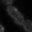

Index: 6012, Label: 2


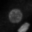

Index: 94737, Label: 5


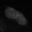

In [31]:
# 1. Preview a few samples
for i in range(3):
    idx, img, label = data[i]
    print(f"Index: {idx}, Label: {label}")
    display(img)

In [32]:
#2. Image size and mode consistency check
sizes = Counter()
modes = Counter()

for _, img, _ in data:
    sizes[img.size] += 1
    modes[img.mode] += 1

print("Image Sizes:", sizes)
print("Image Modes:", modes)

Image Sizes: Counter({(32, 32): 100000})
Image Modes: Counter({'RGB': 89979, 'L': 10021})


In [34]:
#3. Class label distribution

label_counts = Counter()
for _, _, label in data:
    label_counts[label] += 1

print(f"Unique labels: {len(label_counts)}")
print("Label Distribution :")
print(label_counts.most_common(10))

Unique labels: 10
Label Distribution :
[(8, 31802), (2, 23356), (5, 14886), (1, 9171), (4, 7036), (9, 4706), (6, 4642), (3, 3568), (0, 424), (7, 409)]


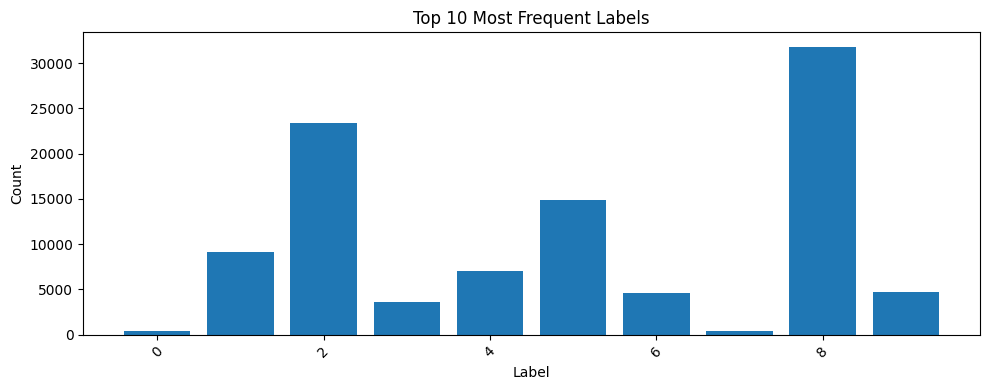

In [35]:
# Convert to label:count lists
labels, counts = zip(*label_counts.most_common(10))

plt.figure(figsize=(10, 4))
plt.bar(labels, counts)
plt.xticks(rotation=45)
plt.title("Top 10 Most Frequent Labels")
plt.xlabel("Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

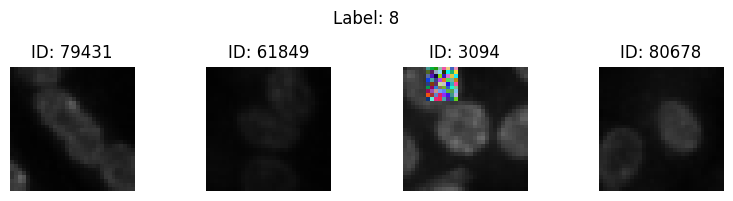

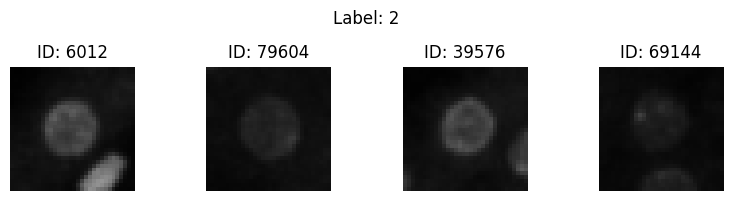

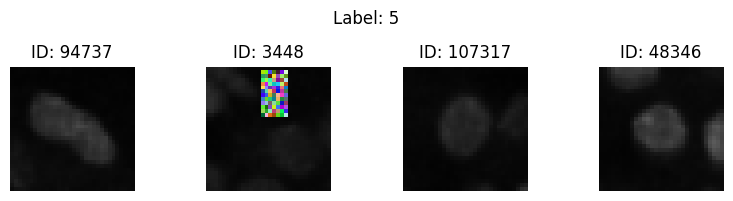

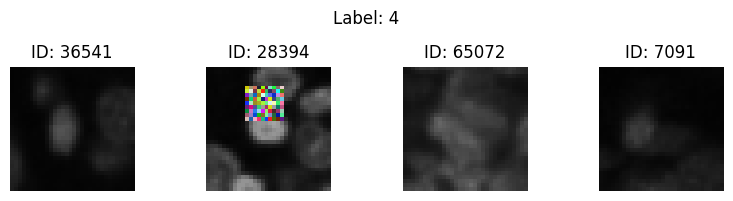

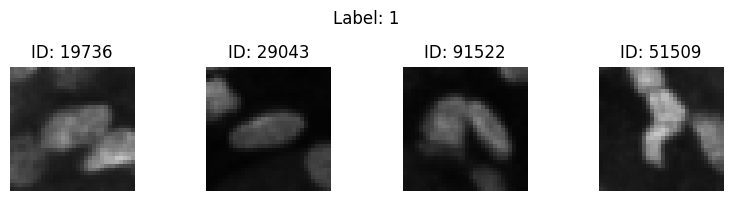

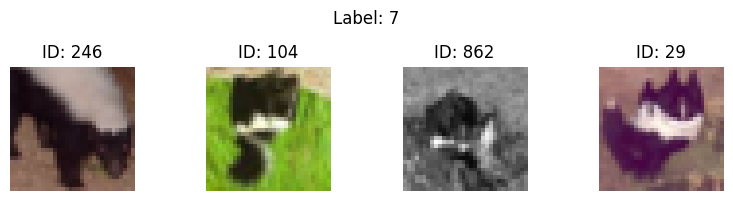

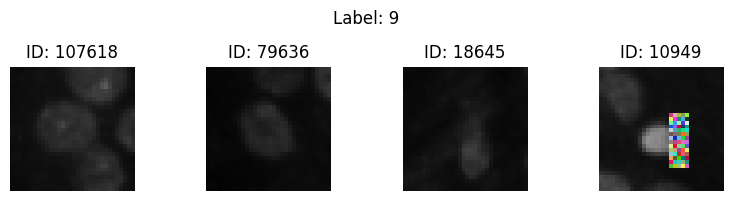

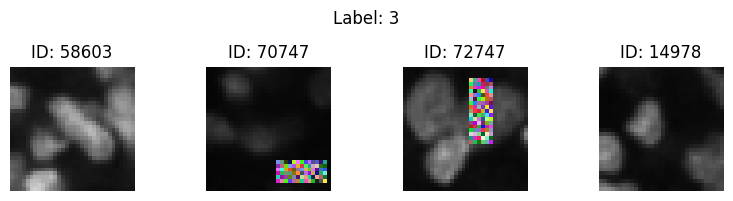

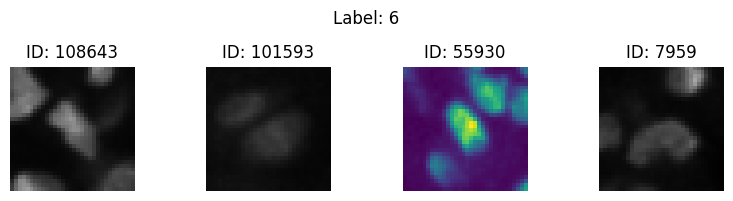

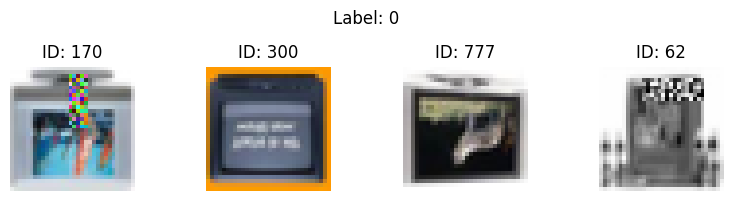

In [36]:
# 4. Viewing 3 to 4 samples of each class 

label_samples = defaultdict(list)

for idx, img, label in data:
    if len(label_samples[label]) < 4:
        label_samples[label].append((idx, img))

# Plotting
for label, samples in list(label_samples.items()):
    fig, axs = plt.subplots(1, len(samples), figsize=(len(samples) * 2, 2))
    fig.suptitle(f"Label: {label}", fontsize=12)
    
    for i, (idx, img) in enumerate(samples):
        axs[i].imshow(img)
        axs[i].axis('off')
        axs[i].set_title(f"ID: {idx}")
    
    plt.tight_layout()
    plt.show()

## 2. Preprocessing

In [38]:
# convert all images to RGB
from PIL import Image

def to_rgb(image):
    return image.convert('RGB') if image.mode != 'RGB' else image

# Assuming data is a list of tuples (idx, img, label)
data = [(idx, to_rgb(img), label) for idx, img, label in data]

In [40]:
# Ensuring the image size and mode consistency check again
sizes = Counter()
modes = Counter()

for _, img, _ in data:
    sizes[img.size] += 1
    modes[img.mode] += 1

print("Image Sizes:", sizes)
print("Image Modes:", modes)

Image Sizes: Counter({(32, 32): 100000})
Image Modes: Counter({'RGB': 100000})
